In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
info_job_level_dfs = {}
info_job_level_dfs["gpu_utilization"] = pd.read_csv("job_level_gpu_utilization.csv")

gputil_all = info_job_level_dfs["gpu_utilization"]

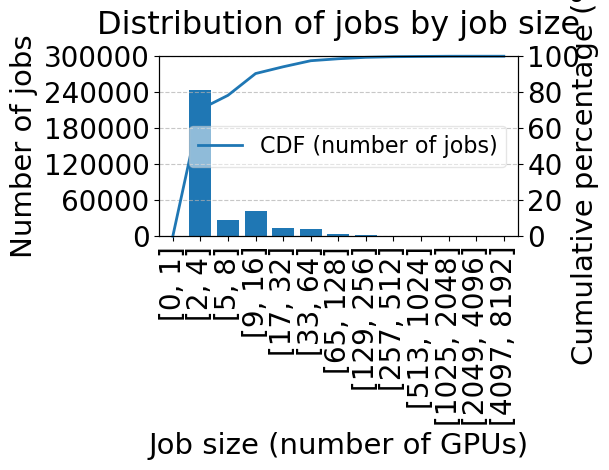

In [3]:
bins = [0, 2, 5, 9, 17, 33, 65, 129, 257, 513, 1025, 2049, 4097, 8193]
bin_labels = [f'[{bins[i]}, {bins[i+1]-1}]' for i in range(len(bins) - 1)]

gputil_all['bin'] = np.digitize(gputil_all["ngpus"], bins, right=True) - 1

jobs_per_bin = gputil_all.groupby('bin').size()

jobs_per_bin = jobs_per_bin.reindex(range(len(bins) - 1), fill_value=0)

cumulative_jobs = jobs_per_bin.cumsum()  
total_jobs = cumulative_jobs.iloc[-1]  
cdf = (cumulative_jobs / total_jobs) * 100 

# Plotting
fig, ax1 = plt.subplots()

ax1.bar(range(len(bin_labels)), jobs_per_bin, tick_label=bin_labels, alpha=1, label='Number of Jobs')
ax1.set_xlabel('Job size (number of GPUs)', fontsize=21)
ax1.set_ylabel('Number of jobs', fontsize=21)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=90, labelsize=20) 
ax1.tick_params(axis='y', labelsize=20)
ax1.set_ylim(0, 250002)
ax1.set_yticks([0, 60000, 120000, 180000, 240000, 300000])
ax1.set_xlim(-0.5, len(bin_labels) - 0.5) 

ax2 = ax1.twinx()
ax2.plot(range(len(bin_labels)), cdf, label='CDF (number of jobs)', linewidth=2, clip_on = False)
ax2.set_ylabel('Cumulative percentage (%)', fontsize=21)
ax2.yaxis.set_label_coords(1.15, 0.4)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_yticks([0, 20, 40, 60, 80, 100])
ax2.set_ylim(0, 100)
plt.legend(loc="center right", fontsize=16, framealpha=0.5)
plt.title("Distribution of jobs by job size", fontsize=23, pad=16)
plt.tight_layout()
plt.show()

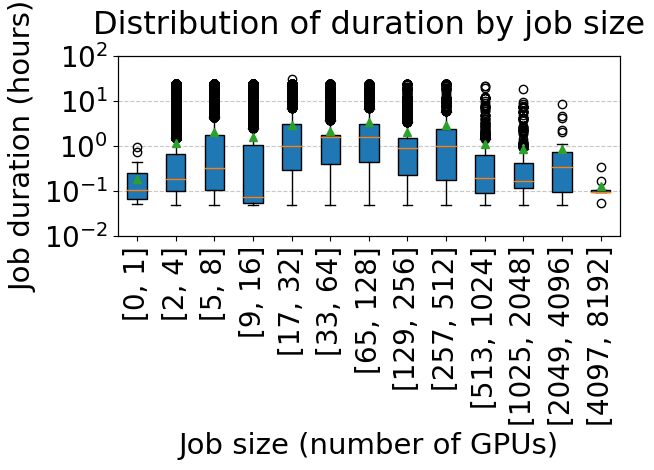

In [4]:
bins = [0, 2, 5, 9, 17, 33, 65, 129, 257, 513, 1025, 2049, 4097, 8193]  
bin_labels = [f'[{bins[i]}, {bins[i+1]-1}]' for i in range(len(bins) - 1)]

gputil_all['bin'] = np.digitize(gputil_all["ngpus"], bins, right=False) - 1

boxplot_data = [
    gputil_all.loc[gputil_all['bin'] == i, 'duration_hours'].dropna()
    for i in range(len(bins) - 1)
]

gpu_hours_per_bin = [data.sum() for data in boxplot_data] 
cumulative_gpu_hours = np.cumsum(gpu_hours_per_bin) 
total_gpu_hours = cumulative_gpu_hours[-1] 
cdf = (cumulative_gpu_hours / total_gpu_hours) * 100  

# Plotting
fig, ax1 = plt.subplots()

boxplot_stats = ax1.boxplot(
    boxplot_data, 
    labels=bin_labels, 
    patch_artist=True, 
    showfliers=True, 
    showmeans=True,  
    # boxprops=dict(facecolor=colors[2]),
    # meanprops=dict(marker=markers[1], markerfacecolor=colors[5], markeredgecolor=colors[5]),
)
ax1.set_xlabel('Job size (number of GPUs)', fontsize=21)
ax1.set_ylabel('Job duration (hours)', fontsize=21)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=90, labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_yscale('log')
ax1.set_yticks([0.01, 0.1, 1, 10, 100])

ax2 = ax1.twinx()
ax2.set_ylabel('', fontsize=21)
ax2.set_yticks([])
plt.title("Distribution of duration by job size", fontsize=23, pad=16)
plt.tight_layout()
plt.show()

/tmp/ipykernel_369687/1171008375.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_utilization = gputil_all.groupby('gpu_range')['mean_utilization'].mean()


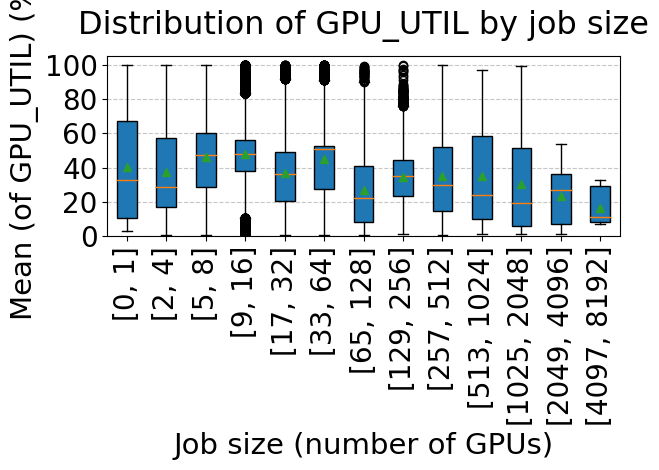

In [5]:
bins = [0, 2, 5, 9, 17, 33, 65, 129, 257, 513, 1025, 2049, 4097, 8193]  # Upper bound for the last bin
bin_labels = [f'[{bins[i]}, {bins[i+1]-1}]' for i in range(len(bins) - 1)]

gputil_all['gpu_range'] = pd.cut(gputil_all['ngpus'], bins=bins, labels=bin_labels, right=False)

mean_utilization = gputil_all.groupby('gpu_range')['mean_utilization'].mean()

boxplot_data = [gputil_all.loc[gputil_all['gpu_range'] == label, 'mean_utilization'].dropna() for label in bin_labels]

total_utilization = [data.sum() for data in boxplot_data]  
cumulative_utilization = np.cumsum(total_utilization)  
total_sum = cumulative_utilization[-1]  
cdf_utilization = (cumulative_utilization / total_sum) * 100 

# Plotting
fig, ax1 = plt.subplots()

ax1.boxplot(
    boxplot_data, 
    labels=bin_labels, 
    patch_artist=True, 
    showfliers=True, 
    showmeans=True,
    # boxprops=dict(facecolor=colors[2]),
    # meanprops=dict(marker=markers[1], markerfacecolor=colors[5], markeredgecolor=colors[5]),
)
ax1.set_xlabel('Job size (number of GPUs)', fontsize=21)
ax1.set_ylabel('Mean (of GPU_UTIL) (%)', fontsize=21)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=90, labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_ylim(0)
ax1.set_yticks([0, 20, 40, 60, 80, 100])

plt.title("Distribution of GPU_UTIL by job size", fontsize=23, pad=16)
plt.tight_layout()
plt.show()
